In [2]:
# Mount Google Drive locally
from google.colab import drive
drive.mount('/content/drive')

# Basics
import math
import numpy as np
import pandas as pd

# ML models
import joblib

# Others
from tqdm import tqdm
import time

Mounted at /content/drive


# Preparing the data

We will:
- Load the ground truth, which contains a subset of semantic joins, a subset of syntactic joins and a sample of the rest of joins.
- Merge it with the distances. That is, for each selected pair "add" the distances between the metrics of their respective profiles
- Remove unnecessary columns for the models (e.g. dataset and attribute names)
- Transform categorical variables into dummies

In [3]:
groundTruth = pd.read_csv('/content/drive/MyDrive/Data Discovery/data/ground_truth_models.csv', header=0)
groundTruth

,ds_name,att_name,ds_name_2,att_name_2,sizeDistinct1,sizeDistinct2,relationship,C,K,J,MultisetJ,cjqMJ
0,AdventureWorks2014_stateprovince.csv,Name,world_country.csv,Name,181,239,NaN,0.044199,0.757322,0.019417,0.019048,1.381513e-03
1,Distributions_data_2016.csv,demographics,Tech_sector_diversity_demographics_2016.csv,raceEthnicity,13,6,syntactic,0.230769,0.461538,0.187500,0.000186,1.041278e-05
2,USA_cars_datasets.csv,country,world_country.csv,Name,2,239,semantic,0.500000,0.008368,0.004167,0.000365,4.659192e-07
3,World_countries_env_vars.csv,Country,world_city.csv,District,243,1366,NaN,0.053498,0.177892,0.006250,0.002314,6.364830e-05
4,books_updated.csv,languageCode,countries_metadatacountries.csv,CountryCode,25,247,syntactic,0.360000,0.101215,0.034091,0.000878,1.381148e-05
...,...,...,...,...,...,...,...,...,...,...,...,...
22605,pte_sulfo.csv,Set,AdventureWorks2014_shift.csv,Name,25,3,NaN,0.000000,0.120000,0.000000,0.000000,0.000000e+00
22606,dataSpotifyClass.csv,song_title,netflix_titles.csv,description,1951,6225,NaN,0.000000,0.313414,0.000000,0.000000,0.000000e+00
22607,pte_methoxy.csv,Arg0,countries_data.csv,1997,35,8717,NaN,0.000000,0.004015,0.000000,0.000000,0.000000e+00
22608,student-mat.csv,internet,AdventureWorks2014_stateprovince.csv,Name,2,181,NaN,0.000000,0.011050,0.000000,0.000000,0.000000e+00


In [4]:
distances = pd.read_csv('/content/drive/MyDrive/Data Discovery/data/distances.csv', header = 0)
distances.drop('Unnamed: 64',  axis='columns', inplace=True)

joined = pd.merge(groundTruth, distances, left_on=['ds_name', 'ds_name_2', 'att_name', 'att_name_2'], right_on=['dataset_name', 'dataset_name_2', 'attribute_name', 'attribute_name_2'])
joined_2 = pd.merge(groundTruth, distances, left_on=['ds_name', 'ds_name_2', 'att_name', 'att_name_2'], right_on=['dataset_name_2', 'dataset_name', 'attribute_name_2', 'attribute_name'])

merged = pd.concat([joined, joined_2], ignore_index=True)
merged

,ds_name,att_name,ds_name_2,att_name_2,sizeDistinct1,sizeDistinct2,relationship,C,K_x,J,...,dataset_name,cardinality,pct_date_time,uniqueness,frequency_5qo,frequency_7qo,words_cnt_min,words_cnt_avg,frequency_sd,pct_phones
0,AdventureWorks2014_stateprovince.csv,Name,world_country.csv,Name,181,239,NaN,0.044199,0.757322,0.019417,...,AdventureWorks2014_stateprovince.csv,-0.071857,0.0,0.000000,0.001341,0.001341,0.000000,1.371837,0.004977,0.0
1,Distributions_data_2016.csv,demographics,Tech_sector_diversity_demographics_2016.csv,raceEthnicity,13,6,syntactic,0.230769,0.461538,0.187500,...,Distributions_data_2016.csv,0.143498,0.0,-0.135553,-0.104895,-0.104895,0.000000,-1.294709,-0.389624,0.0
2,USA_cars_datasets.csv,country,world_country.csv,Name,2,239,semantic,0.500000,0.008368,0.004167,...,USA_cars_datasets.csv,-1.538034,0.0,-0.999200,0.993015,0.993015,-0.409673,-0.830778,3.014091,0.0
3,books_updated.csv,languageCode,countries_metadatacountries.csv,CountryCode,25,247,syntactic,0.360000,0.101215,0.034091,...,books_updated.csv,-1.979207,0.0,-0.997500,-0.003349,0.002351,0.000000,-0.363103,2.702889,0.0
4,cars.csv,color,colors.csv,name,12,135,semantic,0.750000,0.088889,0.065217,...,cars.csv,-0.860310,0.0,-0.999689,0.089943,0.170423,-0.182574,-1.696849,-0.202640,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22605,us_companies.csv,fulltimeemployees,genes_interactions.csv,Type,9,3,NaN,0.000000,0.333333,0.000000,...,genes_interactions.csv,-0.478577,0.0,-0.013717,0.215019,0.385905,0.311248,0.456492,1.088152,0.0
22606,pte_sulfo.csv,Set,AdventureWorks2014_shift.csv,Name,25,3,NaN,0.000000,0.120000,0.000000,...,AdventureWorks2014_shift.csv,-0.707107,0.0,0.000000,0.293333,0.293333,0.000000,0.000000,0.707107,0.0
22607,pte_methoxy.csv,Arg0,countries_data.csv,1997,35,8717,NaN,0.000000,0.004015,0.000000,...,countries_data.csv,1.633221,0.0,-0.148744,-0.033283,-0.033283,-0.133631,-0.147237,-1.312925,0.0
22608,student-mat.csv,internet,AdventureWorks2014_stateprovince.csv,Name,2,181,NaN,0.000000,0.011050,0.000000,...,AdventureWorks2014_stateprovince.csv,1.290401,0.0,0.994937,-0.827387,-0.827387,0.000000,1.788854,-1.897268,0.0


In [ ]:
print(merged.columns)

merged.drop(['ds_name', 'ds_name_2', 'att_name', 'att_name_2', 'sizeDistinct1', 'sizeDistinct2', 'MultisetJ', 'J', 'relationship', 'C', 'K_x', 'K_y', 'dataset_name', 'attribute_name', 'dataset_name_2', 'attribute_name_2', 'cardinalityRaw','cardinalityRaw_2'],  axis='columns', inplace=True)

Index(['ds_name', 'att_name', 'ds_name_2', 'att_name_2', 'sizeDistinct1',
       'sizeDistinct2', 'relationship', 'C', 'K_x', 'J', 'MultisetJ', 'cjqMJ',
       'pct_alphabetic', 'pct_time', 'len_avg_word', 'dataset_name_2',
       'pct_email', 'is_empty_2', 'attribute_name_2', 'pct_username',
       'val_pct_max', 'pct_ip', 'pct_others', 'last_word', 'constancy',
       'pct_alphanumeric', 'len_max_word', 'frequency_iqr', 'pct_date',
       'datatype_2', 'cardinalityRaw', 'frequency_2qo', 'pct_url',
       'frequency_avg', 'frequency_min', 'frequency_4qo', 'val_pct_min',
       'frequency_6qo', 'pct_general', 'freq_word_containment', 'number_words',
       'cardinalityRaw_2', 'val_pct_std', 'freq_word_soundex_containment',
       'words_cnt_sd', 'frequency_max', 'K_y', 'pct_phrases', 'first_word',
       'entropy', 'pct_date_time_specific', 'datatype', 'len_min_word',
       'attribute_name', 'pct_non_alphanumeric', 'is_empty', 'name_dist',
       'pct_unknown', 'pct_numeric', 'is_bina

In [ ]:
# 2 merged, one with the dummies of the datatypes (merged_all), another without them (merged_no_dummies)
merged_all = merged
merged_all = pd.concat([merged_all.drop('datatype', axis=1), pd.get_dummies(merged_all['datatype'], prefix='datatype_', dtype=int)], axis=1)
merged_all = pd.concat([merged_all.drop('datatype_2', axis=1), pd.get_dummies(merged_all['datatype_2'], prefix='datatype_2_', dtype=int)], axis=1)
merged_all = pd.concat([merged_all.drop('specific_type', axis=1), pd.get_dummies(merged_all['specific_type'], prefix='specific_type_', dtype=int)], axis=1)
merged_all = pd.concat([merged_all.drop('specific_type_2', axis=1), pd.get_dummies(merged_all['specific_type_2'], prefix='specific_type_2_', dtype=int)], axis=1)

merged_no_dummies = merged.drop(['datatype', "datatype_2", "specific_type", "specific_type_2"],  axis='columns')

# Model selection

Our goal is to define the best regressor model that can approximate the true value of the joinability metric defined (MJ & K) by using profiles.

We define four base models to do so, whose metrics vary. The first point of variation is the inclusion of "datatypes" metrics (i.e. semantic types/characteristics of each column: names, URIs, etc. / alphabetical, numerical etc. ). These metrics are the most time consuming to compute, which implies that the already lightweight profile-based approach can be made much faster. The second point of variation is the execution (or lack thereof) of feature selection tasks, which further reduce the number of features while, ideally, keeping, or improving, the evaluation scores.

**Result**: for all models, the best performing regressor has been the Random Forest. Nonetheless, further testing with the benchmarks has shown that the Gradient Booster predictor (with no fine-tuning) works best. This might be due to overfitting produced by the Random Forest.


### Model evaluation methodology

We want to define a regression model. To do so, we will employ 12 base regressors (listed below) evaluated over a 10-split CV (test size = 30%) and 4 different metrics, of which we will primarily focus on the RMSE.

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_absolute_error, median_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_validate

split = ShuffleSplit(n_splits=10, test_size=0.3, random_state=211199)

def scoring(estimator, X, y):
    y_pred = estimator.predict(X)
    return {"R2": r2_score(y, y_pred),
            "MAE": mean_absolute_error(y, y_pred),
            "RMSE": math.sqrt(mean_squared_error(y, y_pred)),
            "MedAE": median_absolute_error(y, y_pred),}

names = [
    "Linear Regression",
    "Ridge Regression",
    "Lasso Regression",
    "Random Forests",
    "Gradient Boosting",
    "AdaBoost",
    "MLP Relu",
    "MLP logistic",
    "MLP Tanh",
    "SVR Poly",
    "SVR Rbf"
]

regressors = [
    LinearRegression(),
    Ridge(random_state=211199),
    Lasso(random_state=211199),
    RandomForestRegressor(random_state=211199, n_estimators=50),
    GradientBoostingRegressor(random_state=211199, n_estimators=50),
    AdaBoostRegressor(random_state=211199, n_estimators=25),
    MLPRegressor(random_state=211199, activation = 'relu'),
    MLPRegressor(random_state=211199, activation = 'logistic'),
    MLPRegressor(random_state=211199, activation = 'tanh'),
    SVR(kernel="poly"),
    SVR(kernel="rbf"),
]

def test_list_of_regressors(predictors, target):
  for name, regressor in zip(names, regressors):
    print(name)
    test_regressor(regressor, predictors, target)

def test_regressor(regressor, predictors, target):
  scores = cross_validate(regressor, predictors, target, cv=split, scoring=scoring, verbose=3)
  print("------")
  print("Fit time: ", scores["fit_time"].mean())
  print("Score time: ", scores["score_time"].mean())
  print("------")
  print("R2: ", scores["test_R2"].mean())
  print("MAE: ", scores["test_MAE"].mean())
  print("RMSE: ", scores["test_RMSE"].mean())
  print("MedAE: ", scores["test_MedAE"].mean())
  print("------------------------------")
  print("------------------------------")

### Model 1: All metrics

Model that includes all metrics (likely to overfit and contain redundancy).

In [ ]:
y_MJ = merged_all['cjqMJ']
predictors = merged_all.drop(columns=['cjqMJ'], axis=1)

test_list_of_regressors(predictors, y_MJ)

# Best RMSE:
# RF -> 0.00949
# GB -> 0.01626
# AB -> 0.02011

Linear Regression
[CV] END  MAE: (test=0.009) MedAE: (test=0.003) R2: (test=0.251) RMSE: (test=0.029) total time=   1.1s
[CV] END  MAE: (test=0.009) MedAE: (test=0.003) R2: (test=0.254) RMSE: (test=0.030) total time=   0.4s
[CV] END  MAE: (test=0.009) MedAE: (test=0.003) R2: (test=0.220) RMSE: (test=0.029) total time=   0.5s
[CV] END  MAE: (test=0.009) MedAE: (test=0.003) R2: (test=0.245) RMSE: (test=0.030) total time=   0.5s
[CV] END  MAE: (test=0.009) MedAE: (test=0.003) R2: (test=0.236) RMSE: (test=0.031) total time=   0.4s
[CV] END  MAE: (test=0.009) MedAE: (test=0.003) R2: (test=0.237) RMSE: (test=0.028) total time=   0.6s
[CV] END  MAE: (test=0.009) MedAE: (test=0.004) R2: (test=0.184) RMSE: (test=0.028) total time=   0.3s
[CV] END  MAE: (test=0.009) MedAE: (test=0.003) R2: (test=0.211) RMSE: (test=0.029) total time=   0.3s
[CV] END  MAE: (test=0.009) MedAE: (test=0.003) R2: (test=0.258) RMSE: (test=0.029) total time=   0.3s
[CV] END  MAE: (test=0.009) MedAE: (test=0.003) R2: (te

In [ ]:
y_MJ = merged_all['cjqMJ']
predictors = merged_all.drop(columns=['cjqMJ'], axis=1)

gb = GradientBoostingRegressor(random_state=211199, n_estimators=50)

gb.fit(predictors, y_MJ)

joblib.dump(gb, '/content/drive/My Drive/Data Discovery/models/model_GB_All.pkl')

['/content/drive/My Drive/Data Discovery/models/model_GB_All.pkl']

### Model 2: All metrics + Feature Selection

Model 1 + feature selection process to reduce overfitting and redundancy.

In [ ]:
gb_all = joblib.load('/content/drive/My Drive/Data Discovery/models/model_GB_All.pkl')

feature_importances = gb_all.feature_importances_
predictors = merged_all.drop(columns=['cjqMJ'], axis=1)

# Match feature importances with corresponding feature names
feature_names = list(predictors.columns)
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort the feature importances in descending order
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")

selected_metrics_fs_all = []
for feature, importance in sorted_feature_importances:
  if importance > 0.0001:
    selected_metrics_fs_all.append(feature)

selected_metrics_fs_all = ['freq_word_containment', 'frequency_7qo', 'uniqueness', 'frequency_min', 'first_word', 'frequency_4qo', 'constancy', 'name_dist', 'frequency_iqr',
                    'specific_type_2__pct_username', 'words_cnt_min', 'pct_alphabetic', 'freq_word_soundex_containment', 'len_max_word', 'pct_username', 'last_word',
                    'frequency_max', 'pct_general', 'specific_type__pct_username', 'datatype_2__pct_alphanumeric', 'val_pct_min', 'frequency_2qo', 'len_min_word',
                    'pct_phrases', 'frequency_sd', 'words_cnt_max', 'val_pct_max', 'frequency_avg', 'len_avg_word', 'frequency_6qo', 'cardinality', 'frequency_3qo',
                    'frequency_5qo', 'incompleteness', 'datatype_2__pct_alphabetic', 'pct_unknown', 'specific_type_2__pct_phrases', 'datatype__pct_unknown', 'pct_non_alphanumeric']

freq_word_containment: 0.28885185743591324
frequency_7qo: 0.1439716958563683
uniqueness: 0.1162749508337272
frequency_min: 0.06695943700659206
first_word: 0.06581150899581267
frequency_4qo: 0.04448688510397206
constancy: 0.042442396164353885
name_dist: 0.034974274205556134
frequency_iqr: 0.03180950354365142
specific_type_2__pct_username: 0.02093092665886499
words_cnt_min: 0.014347133506623677
pct_alphabetic: 0.012806022342851853
freq_word_soundex_containment: 0.011159867174259621
len_max_word: 0.010648362422880532
pct_username: 0.009644067918089614
last_word: 0.008770418545902322
frequency_max: 0.008099855702663089
pct_general: 0.006765197610994078
specific_type__pct_username: 0.006737176493299768
datatype_2__pct_alphanumeric: 0.006068972456590583
val_pct_min: 0.005134018060652918
frequency_2qo: 0.005030800645429194
len_min_word: 0.004672559167773173
pct_phrases: 0.004393691976812746
frequency_sd: 0.003983223530100622
words_cnt_max: 0.003219993865986658
val_pct_max: 0.00320391744959515

In [ ]:
y_MJ = merged_all['cjqMJ']
predictors = merged_all[selected_metrics_fs_all]

test_list_of_regressors(predictors, y_MJ)

# Best RMSE:
# RF ->      0.00956
# GB ->      0.01614
# AB ->      0.02019

Linear Regression
[CV] END  MAE: (test=0.009) MedAE: (test=0.003) R2: (test=0.252) RMSE: (test=0.029) total time=   0.1s
[CV] END  MAE: (test=0.009) MedAE: (test=0.003) R2: (test=0.253) RMSE: (test=0.030) total time=   0.1s
[CV] END  MAE: (test=0.009) MedAE: (test=0.003) R2: (test=0.219) RMSE: (test=0.029) total time=   0.1s
[CV] END  MAE: (test=0.009) MedAE: (test=0.003) R2: (test=0.244) RMSE: (test=0.030) total time=   0.1s
[CV] END  MAE: (test=0.009) MedAE: (test=0.003) R2: (test=0.235) RMSE: (test=0.031) total time=   0.1s
[CV] END  MAE: (test=0.009) MedAE: (test=0.003) R2: (test=0.235) RMSE: (test=0.028) total time=   0.1s
[CV] END  MAE: (test=0.009) MedAE: (test=0.004) R2: (test=0.183) RMSE: (test=0.028) total time=   0.1s
[CV] END  MAE: (test=0.009) MedAE: (test=0.003) R2: (test=0.209) RMSE: (test=0.029) total time=   0.1s
[CV] END  MAE: (test=0.009) MedAE: (test=0.003) R2: (test=0.256) RMSE: (test=0.029) total time=   0.1s
[CV] END  MAE: (test=0.009) MedAE: (test=0.003) R2: (te

In [ ]:
y_MJ = merged_all['cjqMJ']
predictors = merged_all[selected_metrics_fs_all]

gb = GradientBoostingRegressor(random_state=211199, n_estimators=50)

gb.fit(predictors, y_MJ)

joblib.dump(gb, '/content/drive/My Drive/Data Discovery/models/model_GB_All_FS.pkl')

['/content/drive/My Drive/Data Discovery/models/model_GB_All_FS.pkl']

### Model 3: No datatypes (i.e. no datatypes, specific datatypes or datatype percentages)

Removal of "datatypes" metrics, which are highly costly and their contribution to the predictions of the model is not ensured.

In [ ]:
y_MJ = merged_no_dummies['cjqMJ']
predictors = merged_no_dummies.drop(columns=['cjqMJ', "pct_numeric", "pct_alphanumeric", "pct_alphabetic", "pct_non_alphanumeric", "pct_date_time", "pct_unknown",
                                      "pct_phones", "pct_email", "pct_url", "pct_ip", "pct_username", "pct_phrases", "pct_general", "pct_date", "pct_time",
                                      "pct_date_time_specific", "pct_others"], axis=1)

test_list_of_regressors(predictors, y_MJ)

# Best RMSE:
# RF ->      0.00981
# GB ->      0.01650
# AB ->      0.02036

Linear Regression
[CV] END  MAE: (test=0.032) MedAE: (test=0.009) R2: (test=0.240) RMSE: (test=0.096) total time=   0.1s
[CV] END  MAE: (test=0.031) MedAE: (test=0.007) R2: (test=0.250) RMSE: (test=0.094) total time=   0.1s
[CV] END  MAE: (test=0.032) MedAE: (test=0.008) R2: (test=0.231) RMSE: (test=0.095) total time=   0.1s
[CV] END  MAE: (test=0.030) MedAE: (test=0.008) R2: (test=0.246) RMSE: (test=0.092) total time=   0.1s
[CV] END  MAE: (test=0.032) MedAE: (test=0.009) R2: (test=0.234) RMSE: (test=0.097) total time=   0.1s
[CV] END  MAE: (test=0.031) MedAE: (test=0.008) R2: (test=0.239) RMSE: (test=0.092) total time=   0.1s
[CV] END  MAE: (test=0.031) MedAE: (test=0.009) R2: (test=0.205) RMSE: (test=0.092) total time=   0.1s
[CV] END  MAE: (test=0.032) MedAE: (test=0.008) R2: (test=0.220) RMSE: (test=0.096) total time=   0.0s
[CV] END  MAE: (test=0.031) MedAE: (test=0.009) R2: (test=0.253) RMSE: (test=0.095) total time=   0.1s
[CV] END  MAE: (test=0.031) MedAE: (test=0.008) R2: (te

KeyboardInterrupt: 

In [ ]:
y_MJ = merged_no_dummies['cjqMJ']
predictors = merged_no_dummies.drop(columns=['cjqMJ', "pct_numeric", "pct_alphanumeric", "pct_alphabetic", "pct_non_alphanumeric", "pct_date_time", "pct_unknown",
                                      "pct_phones", "pct_email", "pct_url", "pct_ip", "pct_username", "pct_phrases", "pct_general", "pct_date", "pct_time",
                                      "pct_date_time_specific", "pct_others"], axis=1)

gb = GradientBoostingRegressor(random_state=211199, n_estimators=50)

gb.fit(predictors, y_MJ)

joblib.dump(gb, '/content/drive/My Drive/Data Discovery/models/model_GB_No_Syntactic.pkl')

['/content/drive/My Drive/Data Discovery/models/model_GB_No_Syntactic.pkl']

### Model 4: No Syntactic + Feature Selection

Model 3 + feature selection process to further trim down the group of metrics, which might cause underfitting.

In [ ]:
gb_no_syntactic = joblib.load('/content/drive/My Drive/Data Discovery/models/model_GB_No_Syntactic.pkl')

feature_importances = gb_no_syntactic.feature_importances_
predictors = merged_all.drop(columns=['cjqMJ'], axis=1)

# Match feature importances with corresponding feature names
feature_names = list(predictors.columns)
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort the feature importances in descending order
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")

selected_metrics_fs_no_syntactic = []
for feature, importance in sorted_feature_importances:
  if importance > 0.0001:
    selected_metrics_fs_no_syntactic.append(feature)

selected_metrics_fs_no_syntactic = ['name_dist', 'frequency_max', 'uniqueness', 'first_word', 'frequency_4qo', 'freq_word_containment', 'len_avg_word', 'words_cnt_max',
                                    'frequency_6qo', 'len_max_word', 'frequency_min', 'frequency_3qo', 'is_empty', 'frequency_iqr', 'entropy', 'val_pct_std',
                                    'words_cnt_min', 'cardinality', 'words_cnt_sd', 'val_pct_max', 'len_min_word', 'words_cnt_avg']

frequency_iqr: 0.285379848904095
first_word: 0.13441522815594487
pct_date_time_specific: 0.07928903224933587
frequency_4qo: 0.0771380724473123
last_word: 0.07545504308732169
val_pct_max: 0.048286691726104225
constancy: 0.0480687827398682
pct_ip: 0.03975828045899903
len_avg_word: 0.02793810725116036
freq_word_containment: 0.02725654126236962
frequency_max: 0.021224799313873104
is_empty_2: 0.018227280602560104
pct_email: 0.015469449798056145
pct_url: 0.014292778802052597
pct_username: 0.013927027519491224
len_min_word: 0.01231679764658362
pct_alphabetic: 0.012174499344694651
pct_phrases: 0.007644024704060568
pct_alphanumeric: 0.006567795295561783
pct_others: 0.0057613649972915945
val_pct_std: 0.00460313812358961
frequency_min: 0.004487519384258479
val_pct_min: 0.004185001669560879
frequency_6qo: 0.003867588163093166
words_cnt_sd: 0.0036563722485074166
freq_word_soundex_containment: 0.0032556529588301086
len_max_word: 0.0023442640574069485
frequency_2qo: 0.0012382229503603154
pct_non_alph

In [ ]:
y_MJ = merged_no_dummies['cjqMJ']
predictors = merged_no_dummies[selected_metrics_fs_no_syntactic]

test_list_of_regressors(predictors, y_MJ)

# Best RMSE:
# RF ->      0.01028
# GB ->      0.01688
# AB ->      0.02086

Linear Regression
[CV] END  MAE: (test=0.007) MedAE: (test=0.001) R2: (test=0.231) RMSE: (test=0.030) total time=   0.1s
[CV] END  MAE: (test=0.007) MedAE: (test=0.001) R2: (test=0.232) RMSE: (test=0.031) total time=   0.1s
[CV] END  MAE: (test=0.007) MedAE: (test=0.001) R2: (test=0.199) RMSE: (test=0.029) total time=   0.1s
[CV] END  MAE: (test=0.007) MedAE: (test=0.001) R2: (test=0.229) RMSE: (test=0.030) total time=   0.1s
[CV] END  MAE: (test=0.008) MedAE: (test=0.002) R2: (test=0.211) RMSE: (test=0.032) total time=   0.1s
[CV] END  MAE: (test=0.007) MedAE: (test=0.001) R2: (test=0.218) RMSE: (test=0.029) total time=   0.1s
[CV] END  MAE: (test=0.007) MedAE: (test=0.002) R2: (test=0.161) RMSE: (test=0.028) total time=   0.1s
[CV] END  MAE: (test=0.008) MedAE: (test=0.001) R2: (test=0.187) RMSE: (test=0.029) total time=   0.1s
[CV] END  MAE: (test=0.007) MedAE: (test=0.001) R2: (test=0.235) RMSE: (test=0.030) total time=   0.1s
[CV] END  MAE: (test=0.007) MedAE: (test=0.001) R2: (te

In [ ]:
y_MJ = merged_no_dummies['cjqMJ']
predictors = merged_no_dummies[selected_metrics_fs_no_syntactic]

gb = GradientBoostingRegressor(random_state=211199, n_estimators=50)

gb.fit(predictors, y_MJ)

joblib.dump(gb, '/content/drive/My Drive/Data Discovery/models/model_GB_No_Syntactic_FS.pkl')

['/content/drive/My Drive/Data Discovery/models/model_GB_No_Syntactic_FS.pkl']

# Benchmark evaluation

Once we have define all the models, we will evaluate each of the five selected benchmarks with all of them, with the goal of discerning which is the best one. To do so, all the distances for all query columns of each benchmark have been obtained and stored.



## Preparation
Load all the model and define the functions to prepare the data for the models. This data preparation depends on the features defined for each model. We also present the function used to obtain the metrics from the benchmark.

In [5]:
gb_all = joblib.load('/content/drive/My Drive/Data Discovery/models/model_GB_All.pkl')
gb_all_fs = joblib.load('/content/drive/My Drive/Data Discovery/models/model_GB_All_FS.pkl')
gb_no_syntactic = joblib.load('/content/drive/My Drive/Data Discovery/models/model_GB_No_Syntactic.pkl')
gb_no_syntactic_fs = joblib.load('/content/drive/My Drive/Data Discovery/models/model_GB_No_Syntactic_FS.pkl')

models = {
    "all": gb_all,
    "all_fs": gb_all_fs,
    "no_syntactic": gb_no_syntactic,
    "no_syntactic_fs": gb_no_syntactic_fs,
}

In [18]:
def prepare_data_for_model(distances, model, type_of_model):
  distances = distances.drop(columns=['dataset_name', 'dataset_name_2', 'attribute_name', 'attribute_name_2'], axis=1)

  maybe_missing_columns = ["datatype__pct_alphabetic", "datatype__pct_date_time", "datatype__pct_non_alphanumeric", "datatype__pct_numeric", "datatype__pct_unknown", "datatype__pct_alphanumeric",
                            "specific_type__pct_date", "specific_type__pct_email", "specific_type__pct_phrases", 'specific_type_2__pct_username', 'datatype_2__pct_alphanumeric', 'datatype_2__pct_alphabetic',
                            'specific_type_2__pct_phrases', "specific_type__pct_general", "specific_type__pct_others", "specific_type__pct_time", "specific_type__pct_url", "specific_type__pct_username",
                            'datatype_2__pct_date_time', 'specific_type_2__pct_date', 'specific_type_2__pct_email', 'specific_type_2__pct_general', 'specific_type_2__pct_url', 'datatype_2__pct_non_alphanumeric',
                            'datatype_2__pct_numeric', 'datatype_2__pct_unknown', 'specific_type_2__pct_others', 'specific_type_2__pct_time']

  if type_of_model == "no_syntactic_fs":
    pass
  elif ("all" in type_of_model):
    distances = pd.concat([distances.drop('datatype', axis=1), pd.get_dummies(distances['datatype'], prefix='datatype_', dtype=int)], axis=1)
    distances = pd.concat([distances.drop('datatype_2', axis=1), pd.get_dummies(distances['datatype_2'], prefix='datatype_2_', dtype=int)], axis=1)
    distances = pd.concat([distances.drop('specific_type', axis=1), pd.get_dummies(distances['specific_type'], prefix='specific_type_', dtype=int)], axis=1)
    distances = pd.concat([distances.drop('specific_type_2', axis=1), pd.get_dummies(distances['specific_type_2'], prefix='specific_type_2_', dtype=int)], axis=1)

    for column in maybe_missing_columns:
      if column not in distances.columns:
        distances[column] = 0
  else:
    distances = distances.drop(columns=['datatype', "datatype_2", "specific_type", "specific_type_2"], axis=1)
    distances = distances.drop(columns=["pct_numeric", "pct_alphanumeric", "pct_alphabetic", "pct_non_alphanumeric", "pct_date_time", "pct_unknown", "pct_phones", "pct_email", "pct_url", "pct_ip",
                                        "pct_username", "pct_phrases", "pct_general", "pct_date", "pct_time", "pct_date_time_specific", "pct_others"], axis=1)

  distances = distances[model.feature_names_in_] # Arrange the columns as in the model
  return distances

In [11]:
def compute_and_evaluate_ranking(model, model_type, k, step, ground_truth_path, distances_folder_path):
  # Read the ground truth and obtain, for every target column, the amount of candidate columns that it has a join with. This will allow us to calculate the recall,
  # as it indicates the maximum possible joins, regardless of the value of k
  ground_truth = pd.read_csv(ground_truth_path, header = 0)
  pair_counts = ground_truth.groupby(['target_ds', 'target_attr']).size().reset_index(name='joins_count')

  # Initialize the matrix of metrics
  num_observations = int(k / step)
  precision = [0] * num_observations
  recall = [0] * num_observations
  max_recall = [0] * num_observations
  MAP = [0] * num_observations

  # Initialize execution time
  total_time = 0

  for index, row in tqdm(pair_counts.iterrows(), total=len(pair_counts)):
      dataset = row['target_ds']
      attribute = row['target_attr']
      count = row['joins_count']

      st = time.time()

      # Read the distances and do some preprocessing
      distances = pd.read_csv(distances_folder_path + 'distances_' + dataset.replace(".csv", "_profile_") + attribute.replace("/", "_").replace(": ","_") + ".csv", header = 0, encoding='latin1', on_bad_lines="skip")

      dataset_names = distances["dataset_name_2"] # We store dataset and attribute names to be used to evaluate the ranking
      attribute_names = distances["attribute_name_2"]
      distances = prepare_data_for_model(distances, model, model_type)

      # Use the model to predict
      y_pred = model.predict(distances)
      distances["predictions"] = y_pred

      distances["target_ds"] = dataset_names
      distances["target_attr"] = attribute_names

      total_time += (time.time() - st) # In the time assessment we do not consider the evaluation of the ranking

      # For every k that we want to assess the ranking of, we get the top k joins and check how many appear in the grpund truth
      for k_iter in range(0, num_observations):
        top_k_joins = distances.sort_values(by='predictions', ascending=False).head((k_iter + 1) * step)

        count_sem = 0
        ap = 0
        for i in range(0, (k_iter + 1) * step):
            top_k_join = top_k_joins.iloc[i]
            result = ground_truth[(ground_truth['target_ds'] == dataset) & (ground_truth['target_attr'] == attribute) &
                                        (ground_truth['candidate_ds'] == top_k_join["target_ds"]) & (ground_truth['candidate_attr'] == top_k_join["target_attr"])]
            if not result.empty:
                count_sem = count_sem + 1
                ap = ap + (count_sem/(i + 1))
        precision[k_iter] = precision[k_iter] + (count_sem/((k_iter + 1) * step))
        if (count_sem != 0):
          MAP[k_iter] = MAP[k_iter] + (ap/count_sem)
        recall[k_iter] = recall[k_iter] + (count_sem/count)
        max_recall[k_iter] = max_recall[k_iter] + (((k_iter + 1) * step)/count)

  print("AVERAGE time to load the distances and execute the model:")
  print("----%.2f----" % (total_time / len(pair_counts)))

  print("Precisions:", [round(element / len(pair_counts), 4) for element in precision])

  # print("Recall:")
  # print([round(element / len(pair_counts), 4) for element in recall])

  # print("Max recall:")
  # print([round(element / len(pair_counts), 4) for element in max_recall])

  print("Recall percentage:", [round((recall_iter / len(pair_counts)) / (max_recall_iter / len(pair_counts)), 4) for recall_iter, max_recall_iter in zip(recall, max_recall)])

  print("MAP:", [round(element / len(pair_counts), 4) for element in MAP])

## Benchmarks

### Santos Small

In [ ]:
k_selection = [10]
step = 1
ground_truth_path = '/content/drive/MyDrive/Data Discovery/data/benchmark_evaluation/santos_small/santos_small_ground_truth.csv'
distances_folder_path = '/content/drive/MyDrive/Data Discovery/data/benchmark_evaluation/santos_small/distances_santos_small/'

for model_type in models:
  print(f"Model {model_type}")
  for k_value in k_selection:
    print(f"For k = {k_value}")
    compute_and_evaluate_ranking(models[model_type], model_type, k_value, step, ground_truth_path, distances_folder_path)
    print("------------------------------------------------------")

Model all
For k = 10


100%|██████████| 50/50 [00:13<00:00,  3.65it/s]


AVERAGE time to load the distances and execute the model:
----0.13----
Precisions: [1.0, 0.96, 0.9333, 0.93, 0.924, 0.9167, 0.9143, 0.9075, 0.9022, 0.898]
Recall percentage: [1.0, 0.9605, 0.9367, 0.9312, 0.9243, 0.9165, 0.9135, 0.9075, 0.9026, 0.8989]
MAP: [1.0, 1.0, 1.0, 0.9917, 0.9895, 0.9889, 0.9872, 0.9863, 0.978, 0.9748]
------------------------------------------------------
Model all_fs
For k = 10


100%|██████████| 50/50 [00:09<00:00,  5.01it/s]


AVERAGE time to load the distances and execute the model:
----0.11----
Precisions: [1.0, 0.96, 0.9333, 0.93, 0.924, 0.9167, 0.9114, 0.9075, 0.9022, 0.9]
Recall percentage: [1.0, 0.9605, 0.9367, 0.9312, 0.9243, 0.9165, 0.9117, 0.9075, 0.9026, 0.9001]
MAP: [1.0, 1.0, 1.0, 0.9917, 0.9895, 0.9889, 0.9872, 0.986, 0.9777, 0.9744]
------------------------------------------------------
Model no_syntactic
For k = 10


100%|██████████| 50/50 [00:13<00:00,  3.65it/s]


AVERAGE time to load the distances and execute the model:
----0.13----
Precisions: [0.98, 0.95, 0.9267, 0.92, 0.912, 0.9, 0.8971, 0.8875, 0.8867, 0.88]
Recall percentage: [0.9795, 0.9502, 0.9293, 0.9195, 0.9107, 0.8987, 0.8951, 0.8855, 0.8844, 0.8775]
MAP: [0.98, 0.98, 0.9867, 0.975, 0.9697, 0.9688, 0.9662, 0.9653, 0.9612, 0.9597]
------------------------------------------------------
Model no_syntactic_fs
For k = 10


100%|██████████| 50/50 [00:13<00:00,  3.64it/s]

AVERAGE time to load the distances and execute the model:
----0.13----
Precisions: [0.98, 0.95, 0.94, 0.925, 0.92, 0.92, 0.9229, 0.9225, 0.9156, 0.916]
Recall percentage: [0.9795, 0.9502, 0.9414, 0.9255, 0.9207, 0.9203, 0.9219, 0.921, 0.9149, 0.9146]
MAP: [0.98, 0.98, 0.9867, 0.9817, 0.977, 0.9687, 0.9654, 0.9647, 0.9643, 0.9626]
------------------------------------------------------


### TUS Small

In [ ]:
k_selection = [60]
step = 10
ground_truth_path = '/content/drive/MyDrive/Data Discovery/data/benchmark_evaluation/tus_small/tus_small_ground_truth.csv'
distances_folder_path = '/content/drive/MyDrive/Data Discovery/data/benchmark_evaluation/tus_small/distances_tus_small/'

for model_type in models:
  print(f"Model {model_type}")
  for k_value in k_selection:
    print(f"For k = {k_value}")
    compute_and_evaluate_ranking(models[model_type], model_type, k_value, step, ground_truth_path, distances_folder_path)
    print("------------------------------------------------------")

Model all
For k = 60


100%|██████████| 100/100 [04:07<00:00,  2.48s/it]


AVERAGE time to load the distances and execute the model:
----1.28----
Precisions: [0.97, 0.8895, 0.819, 0.8115, 0.815, 0.8185]
Recall percentage: [0.976, 0.8893, 0.8149, 0.806, 0.8082, 0.8105]
MAP: [0.9793, 0.9767, 0.9719, 0.9479, 0.9311, 0.9236]
------------------------------------------------------
Model all_fs
For k = 60


100%|██████████| 100/100 [02:40<00:00,  1.60s/it]


AVERAGE time to load the distances and execute the model:
----0.30----
Precisions: [0.97, 0.8895, 0.819, 0.8115, 0.815, 0.8185]
Recall percentage: [0.976, 0.8893, 0.8149, 0.806, 0.8082, 0.8105]
MAP: [0.9793, 0.9767, 0.9719, 0.9479, 0.9311, 0.9236]
------------------------------------------------------
Model no_syntactic
For k = 60


100%|██████████| 100/100 [02:35<00:00,  1.55s/it]


AVERAGE time to load the distances and execute the model:
----0.26----
Precisions: [0.978, 0.8895, 0.811, 0.788, 0.7734, 0.7602]
Recall percentage: [0.9823, 0.8892, 0.8044, 0.7751, 0.7522, 0.7309]
MAP: [0.983, 0.9803, 0.9742, 0.9493, 0.9323, 0.9231]
------------------------------------------------------
Model no_syntactic_fs
For k = 60


100%|██████████| 100/100 [02:12<00:00,  1.33s/it]

AVERAGE time to load the distances and execute the model:
----0.22----
Precisions: [0.975, 0.911, 0.855, 0.8647, 0.8734, 0.8845]
Recall percentage: [0.9801, 0.9177, 0.863, 0.8724, 0.881, 0.8916]
MAP: [0.9801, 0.9779, 0.9711, 0.942, 0.925, 0.9171]
------------------------------------------------------


### TUS Big

In [ ]:
k_selection = [60]
step = 10
ground_truth_path = '/content/drive/MyDrive/Data Discovery/data/benchmark_evaluation/tus_big/tus_big_ground_truth_sample.csv'
distances_folder_path = '/content/drive/MyDrive/Data Discovery/data/benchmark_evaluation/tus_big/distances_tus_big/'

for model_type in models:
  print(f"Model {model_type}")
  for k_value in k_selection:
    print(f"For k = {k_value}")
    compute_and_evaluate_ranking(models[model_type], model_type, k_value, step, ground_truth_path, distances_folder_path)
    print("------------------------------------------------------")

Model all
For k = 60


100%|██████████| 100/100 [17:50<00:00, 10.70s/it]


AVERAGE time to load the distances and execute the model:
----2.21----
Precisions: [0.977, 0.967, 0.947, 0.932, 0.921, 0.915]
Recall percentage: [0.9558, 0.9361, 0.8972, 0.8643, 0.8356, 0.8188]
MAP: [0.9844, 0.9816, 0.9776, 0.9744, 0.9698, 0.9663]
------------------------------------------------------
Model all_fs
For k = 60


100%|██████████| 100/100 [15:34<00:00,  9.34s/it]


AVERAGE time to load the distances and execute the model:
----0.99----
Precisions: [0.974, 0.966, 0.9467, 0.9313, 0.9188, 0.9115]
Recall percentage: [0.9537, 0.9355, 0.8972, 0.8644, 0.8354, 0.8186]
MAP: [0.9828, 0.9801, 0.9764, 0.9736, 0.9694, 0.9663]
------------------------------------------------------
Model no_syntactic
For k = 60


100%|██████████| 100/100 [15:29<00:00,  9.30s/it]


AVERAGE time to load the distances and execute the model:
----0.94----
Precisions: [0.98, 0.97, 0.9477, 0.9235, 0.9062, 0.8942]
Recall percentage: [0.9586, 0.9469, 0.9104, 0.868, 0.8322, 0.8051]
MAP: [0.9894, 0.9848, 0.9823, 0.9784, 0.9718, 0.9685]
------------------------------------------------------
Model no_syntactic_fs
For k = 60


100%|██████████| 100/100 [15:13<00:00,  9.14s/it]

AVERAGE time to load the distances and execute the model:
----0.87----
Precisions: [0.986, 0.986, 0.982, 0.971, 0.9604, 0.9505]
Recall percentage: [0.981, 0.9723, 0.9565, 0.9331, 0.9104, 0.8857]
MAP: [0.9965, 0.9914, 0.9898, 0.9893, 0.9876, 0.986]
------------------------------------------------------


### D3L

In [22]:
k_value = 100
step = 10
ground_truth_path = '/content/drive/MyDrive/Data Discovery/data/benchmark_evaluation/d3l/d3l_ground_truth_sample.csv'
distances_folder_path = '/content/drive/MyDrive/Data Discovery/data/benchmark_evaluation/d3l/distances_d3l/'

model_type = "no_syntactic_fs"
compute_and_evaluate_ranking(models[model_type], model_type, k_value, step, ground_truth_path, distances_folder_path)
print("------------------------------------------------------")

100%|██████████| 100/100 [06:44<00:00,  4.04s/it]

AVERAGE time to load the distances and execute the model:
----0.10----
Precisions: [0.81, 0.817, 0.8363, 0.8068, 0.7784, 0.783, 0.7903, 0.7792, 0.7623, 0.7463]
Recall percentage: [0.8109, 0.8184, 0.837, 0.8063, 0.7767, 0.7793, 0.7849, 0.7725, 0.7547, 0.7379]
MAP: [0.7402, 0.7915, 0.8079, 0.8172, 0.8204, 0.8178, 0.8179, 0.8208, 0.8235, 0.8269]
------------------------------------------------------


### Freyja

In [23]:
k_value = 10
step = 1
ground_truth_path = '/content/drive/MyDrive/Data Discovery/data/benchmark_evaluation/freyja/freyja_ground_truth.csv'
distances_folder_path = '/content/drive/MyDrive/Data Discovery/data/benchmark_evaluation/freyja/distances_freyja/'

model_type = "no_syntactic_fs"
compute_and_evaluate_ranking(models[model_type], model_type, k_value, step, ground_truth_path, distances_folder_path)
print("------------------------------------------------------")

100%|██████████| 50/50 [00:05<00:00,  9.89it/s]

AVERAGE time to load the distances and execute the model:
----0.02----
Precisions: [1.0, 0.97, 0.96, 0.95, 0.948, 0.9533, 0.9429, 0.935, 0.9289, 0.924]
Recall percentage: [1.0, 0.9673, 0.957, 0.9474, 0.9469, 0.954, 0.9422, 0.9354, 0.9309, 0.9266]
MAP: [1.0, 1.0, 0.9967, 0.9911, 0.9804, 0.9749, 0.9724, 0.9697, 0.9677, 0.9661]
------------------------------------------------------


## Plots

### Santos Small

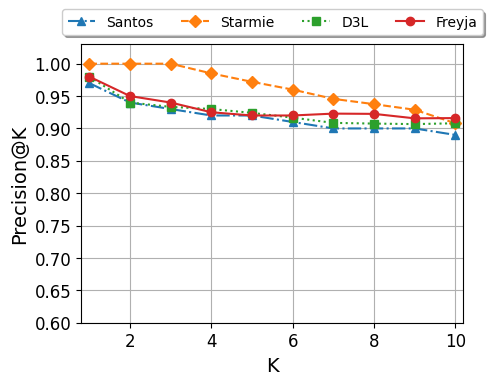

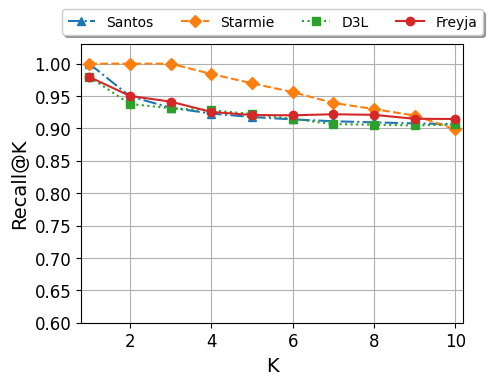

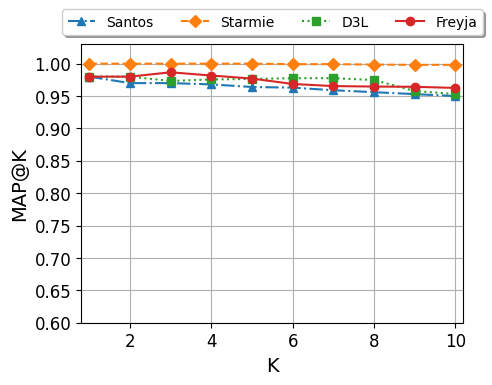

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for each metric
x = range(1, 11)

# Data for Precision@K
freyja_precision = [0.98, 0.95, 0.94, 0.925, 0.92, 0.92, 0.9229, 0.9225, 0.9156, 0.916]
starmie_precision = [1.0, 1.0, 1.0, 0.985, 0.972, 0.96, 0.9457, 0.9375, 0.9289, 0.908]
santos_precision = [0.97, 0.94, 0.93, 0.92, 0.92, 0.91, 0.90, 0.90, 0.90, 0.89]
d3l_precision = [0.98, 0.94, 0.9333, 0.93, 0.924, 0.9167, 0.9086, 0.9075, 0.9067, 0.908]

# Data for Recall@K
freyja_recall = [0.9795, 0.9502, 0.9414, 0.9255, 0.9207, 0.9203, 0.9219, 0.921, 0.9149, 0.9146]
starmie_recall = [1.0, 1.0, 1.0, 0.9841, 0.9697, 0.9561, 0.9394, 0.9299, 0.9199, 0.8986]
santos_recall = [1.0, 0.9496, 0.9320, 0.9230, 0.9176, 0.9140, 0.9111, 0.9094, 0.9078, 0.9066]
d3l_recall = [0.9795, 0.9378, 0.9312, 0.928, 0.9223, 0.915, 0.9066, 0.9058, 0.9046, 0.9061]

# Data for MAP@K
freyja_map = [0.98, 0.98, 0.9867, 0.9817, 0.977, 0.9687, 0.9654, 0.9647, 0.9643, 0.9626]
starmie_map = [1.0, 1.0, 1.0, 1.0, 1.0, 0.9993, 0.9993, 0.9986, 0.9982, 0.9982]
santos_map = [0.98, 0.97, 0.97, 0.968, 0.964, 0.963, 0.959, 0.956, 0.953, 0.95]
d3l_map = [0.98, 0.98, 0.9733, 0.9756, 0.9764, 0.9776, 0.9776, 0.9748, 0.9579, 0.953]

# Labels and data for each metric
metrics = [
    ('Precision@K', freyja_precision, santos_precision, starmie_precision, d3l_precision),
    ('Recall@K', freyja_recall, santos_recall, starmie_recall, d3l_recall),
    ('MAP@K', freyja_map, santos_map, starmie_map, d3l_map)
]

markers = ['^', 'D', 's', 'o']
linestyles = ['-.', '--', ':', '-']
labels = ['Santos', 'Starmie', 'D3L', 'Freyja']

# Plotting each metric in a separate figure
for ylabel, freyja, santos, starmie, d3l in metrics:
    plt.figure(figsize=(5, 4))
    for data, marker, linestyle, label in zip([santos, starmie, d3l, freyja], markers, linestyles, labels):
        plt.plot(x, data, marker=marker, linestyle=linestyle, label=label)
    plt.xlabel('K', fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=4)
    plt.xlim(0.8, 10.2)
    plt.ylim(0.6, 1.03)
    plt.xticks(range(2, 11, 2))
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### TUS Small

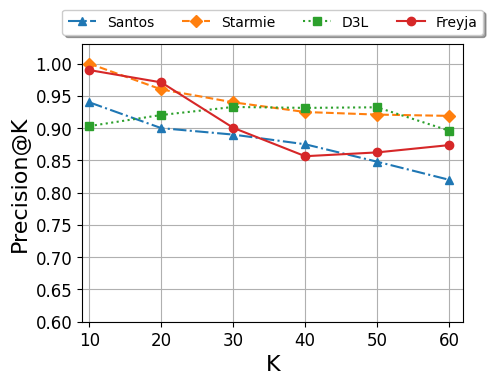

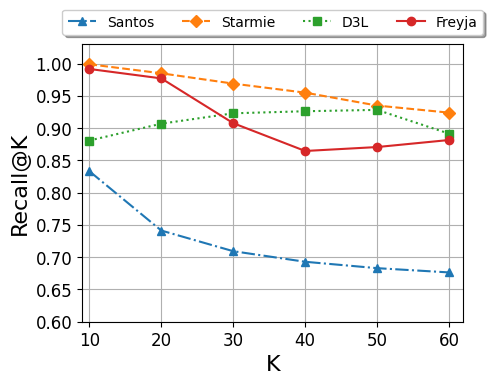

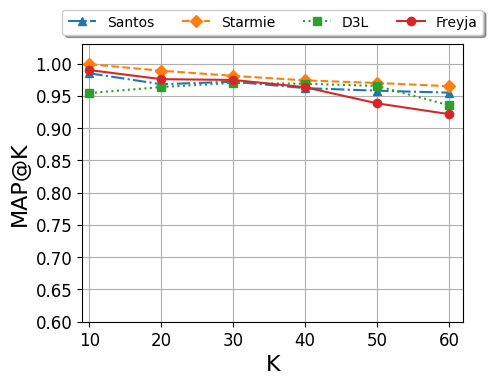

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for each metric
x = range(10, 70, 10)

# Data for Precision@K
freyja_precision = [0.99, 0.9709, 0.9005, 0.8565, 0.8624, 0.8737]
starmie_precision = [1.0, 0.96, 0.94, 0.925, 0.921, 0.919]
santos_precision = [0.94, 0.9, 0.89, 0.875, 0.848, 0.82]
d3l_precision = [0.9032, 0.9204, 0.9328, 0.9314, 0.9323, 0.8961]

# Data for Recall@K
freyja_recall = [0.9917, 0.9771, 0.9077, 0.8646, 0.8707, 0.8816]
starmie_recall = [0.999, 0.985, 0.969, 0.955, 0.935, 0.924]
santos_recall = [0.8333, 0.7413, 0.7093, 0.6929, 0.6830, 0.6764]
d3l_recall = [0.8808, 0.9069, 0.9230, 0.9262, 0.9283, 0.8915]

# Data for MAP@K
freyja_map = [0.99, 0.9759, 0.9747, 0.9634, 0.9384, 0.9217]
starmie_map = [0.999, 0.989, 0.981, 0.974, 0.97, 0.965]
santos_map = [0.985, 0.968, 0.972, 0.962, 0.958, 0.955]
d3l_map = [0.9544, 0.9637, 0.9701, 0.9688, 0.9654, 0.9354]

# Labels and data for each metric
metrics = [
    ('Precision@K', freyja_precision, santos_precision, starmie_precision, d3l_precision),
    ('Recall@K', freyja_recall, santos_recall, starmie_recall, d3l_recall),
    ('MAP@K', freyja_map, santos_map, starmie_map, d3l_map)
]

markers = ['^', 'D', 's', 'o']
linestyles = ['-.', '--', ':', '-']
labels = ['Santos', 'Starmie', 'D3L', 'Freyja']

# Plotting each metric in a separate figure
for ylabel, freyja, santos, starmie, d3l in metrics:
    plt.figure(figsize=(5, 4))
    for data, marker, linestyle, label in zip([santos, starmie, d3l, freyja], markers, linestyles, labels):
        plt.plot(x, data, marker=marker, linestyle=linestyle, label=label)
    plt.xlabel('K', fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=4)
    plt.xlim(9, 62)
    plt.ylim(0.6, 1.03)
    plt.xticks(range(10, 70, 10))
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### TUS Big

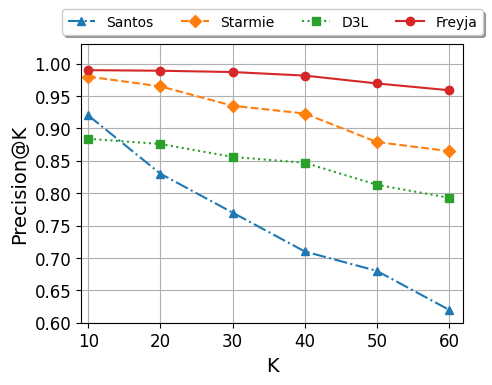

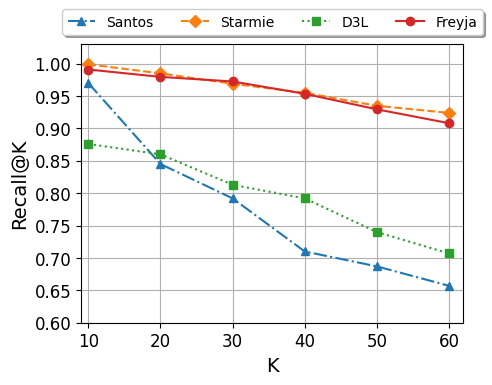

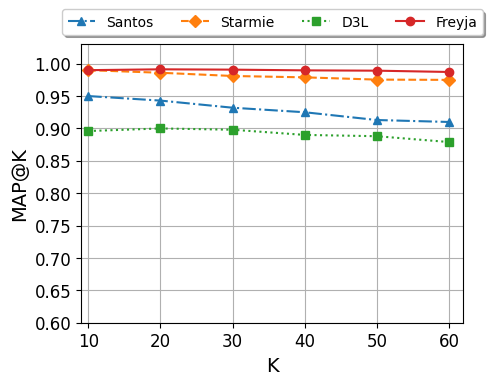

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for each metric
x = range(10, 70, 10)

# Data for Precision@K
freyja_precision = [0.99, 0.9891, 0.9871, 0.9816, 0.9695, 0.959]
starmie_precision = [0.98, 0.965, 0.935, 0.923, 0.879, 0.865]
santos_precision = [0.92, 0.83, 0.77, 0.71, 0.68, 0.62]
d3l_precision = [0.884, 0.876, 0.856, 0.847, 0.813, 0.793]

# Data for Recall@K
freyja_recall = [0.991, 0.9796, 0.9725, 0.9535, 0.9295, 0.9081]
starmie_recall = [0.999, 0.985, 0.969, 0.955, 0.935, 0.924]
santos_recall = [0.97, 0.845, 0.792, 0.71, 0.687, 0.657]
d3l_recall = [0.876, 0.86, 0.813, 0.792, 0.74, 0.707]

# Data for MAP@K
freyja_map = [0.99, 0.9913, 0.9908, 0.9897, 0.9892, 0.9872]
starmie_map = [0.99, 0.986, 0.981, 0.9789, 0.9754, 0.975]
santos_map = [0.95, 0.943, 0.932, 0.925, 0.913, 0.910]
d3l_map = [0.896, 0.90, 0.898, 0.89, 0.888, 0.879]

# Labels and data for each metric
metrics = [
    ('Precision@K', freyja_precision, santos_precision, starmie_precision, d3l_precision),
    ('Recall@K', freyja_recall, santos_recall, starmie_recall, d3l_recall),
    ('MAP@K', freyja_map, santos_map, starmie_map, d3l_map)
]

markers = ['^', 'D', 's', 'o']
linestyles = ['-.', '--', ':', '-']
labels = ['Santos', 'Starmie', 'D3L', 'Freyja']

# Plotting each metric in a separate figure
for ylabel, freyja, santos, starmie, d3l in metrics:
    plt.figure(figsize=(5, 4))
    for data, marker, linestyle, label in zip([santos, starmie, d3l, freyja], markers, linestyles, labels):
        plt.plot(x, data, marker=marker, linestyle=linestyle, label=label)
    plt.xlabel('K', fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=4)
    plt.xlim(9, 62)
    plt.ylim(0.6, 1.03)
    plt.xticks(range(10, 70, 10))
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### D3L

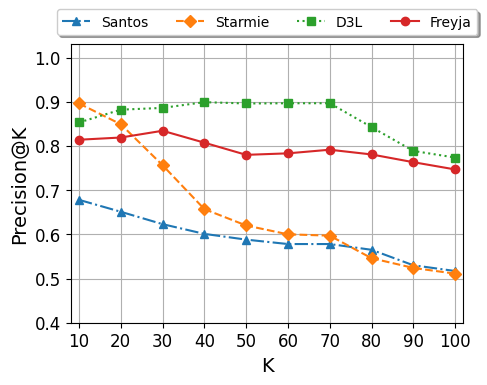

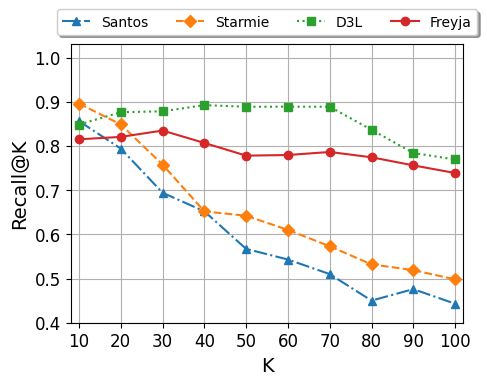

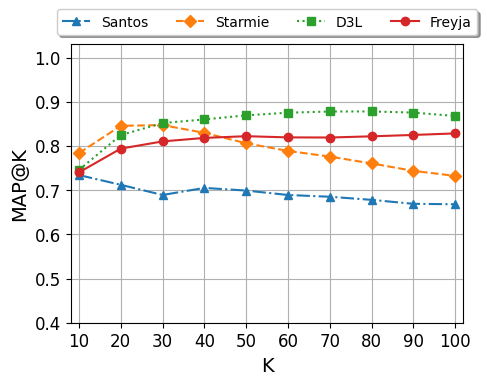

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for each metric
x = range(10, 110, 10)

# Data for Precision@K
freyja_precision = [0.814, 0.819, 0.8343, 0.8073, 0.7798, 0.7832, 0.7914, 0.7807, 0.7632, 0.7468]
starmie_precision = [0.896, 0.849, 0.7563, 0.657, 0.62, 0.6, 0.597, 0.546, 0.524, 0.511]
santos_precision = [0.678, 0.651, 0.623, 0.601, 0.588, 0.578, 0.578, 0.565, 0.530, 0.517]
d3l_precision = [0.853, 0.882, 0.886, 0.899, 0.896, 0.8965, 0.8966, 0.8426, 0.7887, 0.7737]

# Data for Recall@K
freyja_recall = [0.815, 0.8204, 0.8348, 0.8067, 0.778, 0.7794, 0.7863, 0.7743, 0.756, 0.7387]
starmie_recall = [0.8957, 0.8485, 0.7577, 0.6519, 0.642, 0.61, 0.573, 0.532, 0.519, 0.498]
santos_recall = [0.856, 0.794, 0.694, 0.652, 0.567, 0.543, 0.51, 0.45, 0.476, 0.443]
d3l_recall = [0.8483, 0.8762, 0.8783, 0.8923, 0.8886, 0.8888, 0.8886, 0.8365, 0.7841, 0.7693]

# Data for MAP@K
freyja_map = [0.7402, 0.7939, 0.8102, 0.8181, 0.822, 0.8193, 0.819, 0.8217, 0.8248, 0.8283]
starmie_map = [0.7838, 0.8455, 0.8471, 0.8295, 0.806, 0.7887, 0.7759, 0.7604, 0.7436, 0.7322]
santos_map = [0.734, 0.712, 0.689, 0.705, 0.699, 0.689, 0.685, 0.678, 0.669, 0.668]
d3l_map = [0.7458, 0.8246, 0.8517, 0.8599, 0.8692, 0.8751, 0.8779, 0.878, 0.8754, 0.8677]

# Labels and data for each metric
metrics = [
    ('Precision@K', freyja_precision, santos_precision, starmie_precision, d3l_precision),
    ('Recall@K', freyja_recall, santos_recall, starmie_recall, d3l_recall),
    ('MAP@K', freyja_map, santos_map, starmie_map, d3l_map)
]

markers = ['^', 'D', 's', 'o']
linestyles = ['-.', '--', ':', '-']
labels = ['Santos', 'Starmie', 'D3L', 'Freyja']

# Plotting each metric in a separate figure
for ylabel, freyja, santos, starmie, d3l in metrics:
    plt.figure(figsize=(5, 4))
    for data, marker, linestyle, label in zip([santos, starmie, d3l, freyja], markers, linestyles, labels):
        plt.plot(x, data, marker=marker, linestyle=linestyle, label=label)
    plt.xlabel('K', fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=4)
    plt.xlim(8, 102)
    plt.ylim(0.4, 1.03)
    plt.xticks(range(10, 110, 10))
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Freyja

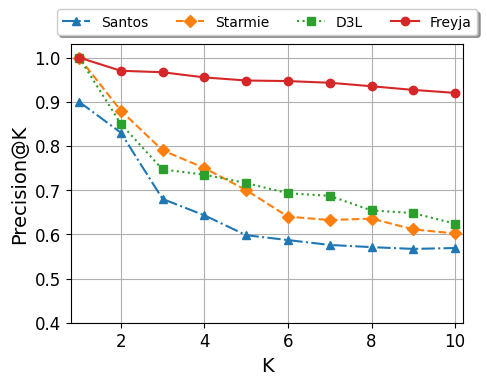

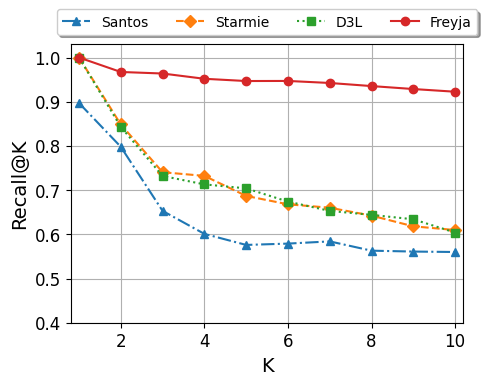

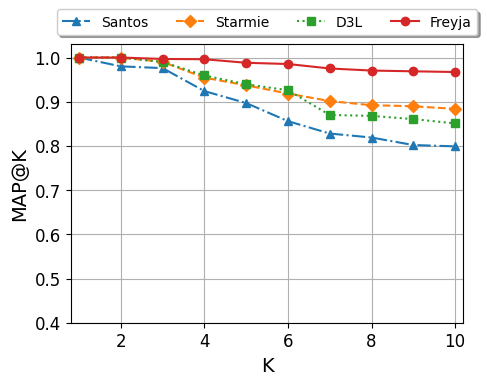

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for each metric
x = range(1, 11)

# Data for Precision@K
freyja_precision = [1.0, 0.97, 0.9667, 0.955, 0.948, 0.9467, 0.9429, 0.935, 0.9267, 0.92]
starmie_precision = [1.0, 0.88, 0.79, 0.75, 0.7, 0.64, 0.6323, 0.6356, 0.6111, 0.602]
santos_precision = [0.9, 0.83, 0.68, 0.643, 0.598, 0.587, 0.576, 0.571, 0.567, 0.569]
d3l_precision = [1.0, 0.85, 0.7467, 0.735, 0.716, 0.693, 0.687, 0.654, 0.648, 0.624]

# Data for Recall@K
santos_raw = np.linspace(0.08, 0.68, 10)
ideal = np.linspace(0.08, 0.75, 10)
freyja_recall = [1.0, 0.9673, 0.9638, 0.9519, 0.9468, 0.947, 0.9424, 0.9354, 0.9287, 0.9226]
starmie_recall = [1.0, 0.8485, 0.7405, 0.7322, 0.6869, 0.6679, 0.6602, 0.6423, 0.6181, 0.6097]
santos_recall = [0.897, 0.798, 0.653, 0.601, 0.576, 0.579, 0.584, 0.563, 0.561, 0.560]
d3l_recall = [1, 0.843, 0.732, 0.713, 0.704, 0.674, 0.653, 0.644, 0.634, 0.604]

# Data for MAP@K
freyja_map = [1.0, 1.0, 0.9967, 0.9961, 0.9881, 0.9853, 0.9752, 0.9705, 0.9688, 0.9672]
starmie_map = [1.0, 1.0, 0.99, 0.9544, 0.9371, 0.9185, 0.9015, 0.8921, 0.8898, 0.8838]
santos_map = [1.0, 0.98, 0.976, 0.924, 0.897, 0.856, 0.828, 0.819, 0.802, 0.799]
d3l_map = [1.0, 1.0, 0.99, 0.9594, 0.9394, 0.926, 0.8701, 0.8679, 0.8607, 0.8509]

# Labels and data for each metric
metrics = [
    ('Precision@K', freyja_precision, santos_precision, starmie_precision, d3l_precision),
    ('Recall@K', freyja_recall, santos_recall, starmie_recall, d3l_recall),
    ('MAP@K', freyja_map, santos_map, starmie_map, d3l_map)
]

markers = ['^', 'D', 's', 'o']
linestyles = ['-.', '--', ':', '-']
labels = ['Santos', 'Starmie', 'D3L', 'Freyja']

# Plotting each metric in a separate figure
for ylabel, freyja, santos, starmie, d3l in metrics:
    plt.figure(figsize=(5, 4))
    for data, marker, linestyle, label in zip([santos, starmie, d3l, freyja], markers, linestyles, labels):
        plt.plot(x, data, marker=marker, linestyle=linestyle, label=label)
    plt.xlabel('K', fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=4)
    plt.xlim(0.8, 10.2)
    plt.ylim(0.4, 1.03)
    plt.xticks(range(2, 11, 2))
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Scalability

#### Preparation time

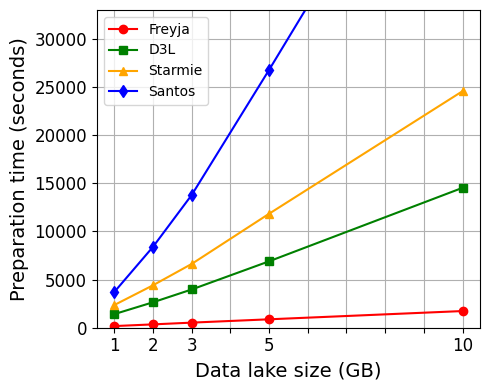

In [ ]:
import matplotlib.pyplot as plt

# Data
freyja_r_times = [171, 347, 529, 874, 1732]
d3l_times = [1412, 2643, 3973, 6899, 14533]
starmie_times = [2356, 4409, 6627, 11840, 24572]
santos_times = [3712, 8403, 13789, 26784, 60000]
indices = [1, 2, 3, 5, 10]

# Generate ticks and labels
x_ticks = list(range(1, 11))  # Generate ticks from 1 to 10
x_tick_labels = [f'{tick}' if tick in indices else '' for tick in x_ticks]  # Label only where indices are specified

# Plotting
plt.figure(figsize=(5, 4))

plt.plot(indices, freyja_r_times, marker='o', linestyle='-', color='r', label='Freyja')
plt.plot(indices, d3l_times, marker='s', linestyle='-', color='g', label='D3L')
plt.plot(indices, starmie_times, marker='^', linestyle='-', color='orange', label='Starmie')
plt.plot(indices, santos_times, marker='d', linestyle='-', color='b', label='Santos')

plt.xlabel('Data lake size (GB)', fontsize=14)
plt.ylabel('Preparation time (seconds)', fontsize=14)
plt.ylim(0, 33000)
plt.xticks(x_ticks, x_tick_labels)  # Set custom ticks and labels
plt.grid(True)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

#### Query time

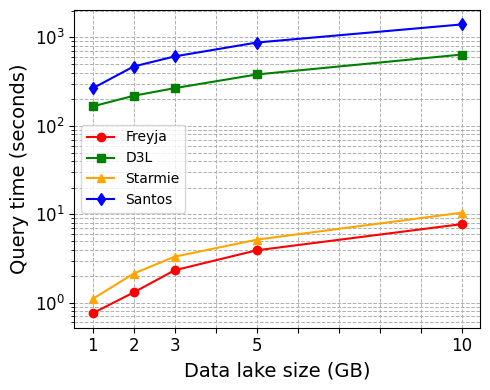

In [ ]:
import matplotlib.pyplot as plt

# Data
freyja_times = [0.761, 1.309, 2.332, 3.918, 7.749]
starmie_times = [1.104, 2.14, 3.32, 5.17, 10.43]
d3l_times = [166 , 219 , 267, 381, 640]
santos_times = [266, 469, 610, 875, 1402]
indices = [1, 2, 3, 5, 10]

# Generate ticks and labels
x_ticks = list(range(1, 11))  # Generate ticks from 1 to 10
x_tick_labels = [f'{tick}' if tick in indices else '' for tick in x_ticks]  # Label only where indices are specified

# Plotting
plt.figure(figsize=(5, 4))

plt.plot(indices, freyja_times, marker='o', linestyle='-', color='r', label='Freyja')
plt.plot(indices, d3l_times, marker='s', linestyle='-', color='g', label='D3L')
plt.plot(indices, starmie_times, marker='^', linestyle='-', color='orange', label='Starmie')
plt.plot(indices, santos_times, marker='d', linestyle='-', color='b', label='Santos')

plt.xlabel('Data lake size (GB)', fontsize=14)
plt.ylabel('Query time (seconds)', fontsize=14)
plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.xticks(x_ticks, x_tick_labels)  # Set custom ticks and labels
plt.grid(True, which='both', linestyle='--', linewidth=0.7)  # Grid for both major and minor ticks
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()